# Проект: Аналитика сервиса аренды самокатов GoFast

## Введение

Сервис аренды самокатов GoFast предоставляет пользователям быстрый, удобный и доступный способ передвижения по городу. Клиенты могут выбирать между двумя тарифами: базовым, без абонентской платы, и подпиской Ultra, предлагающей скидки на поездки. В рамках исследования будет проанализировано поведение пользователей, оценены особенности их взаимодействия с сервисом и проверены гипотезы, направленные на развитие бизнеса.

## Цель исследования

Целью исследования является анализ поведения пользователей сервиса GoFast для проверки гипотез, которые могут способствовать увеличению числа пользователей с подпиской, повышению доходов компании и улучшению пользовательского опыта.

## Описание данных

Исходные данные представлены тремя таблицами:

*Пользователи (`users_go.csv`):* <br/>
user_id — уникальный идентификатор пользователя;<br/>
name — имя пользователя;<br/>
age — возраст;<br/>
city — город;<br/>
subscription_type — тип подписки (free, ultra).

*Поездки (`rides_go.csv`):* <br/>
user_id — уникальный идентификатор пользователя;<br/>
distance — расстояние поездки (в метрах);<br/>
duration — продолжительность поездки (в минутах);<br/>
date — дата поездки.

*Подписки (`subscriptions_go.csv`):* <br/>
subscription_type — тип подписки;<br/>
minute_price — стоимость одной минуты поездки; <br/>
start_ride_price — стоимость начала поездки;<br/>
subscription_fee — стоимость ежемесячной подписки.

## План исследования:

1 [Загрузка данных](#link1) <br/>
1.1 Загрузить данные из файлов /datasets/users_go.csv, /datasets/rides_go.csv, /datasets/subscriptions_go.csv в датафреймы с помощью библиотеки pandas. <br/>
1.2 Вывести первые строки каждого набора данных и изучить их структуру. <br/>

2 [Предобработка данных](#link2) <br/>
2.1 Привести столбец date в датафрейме поездок к типу datetime. <br/>
2.2 Создать новый столбец с номером месяца на основе даты. <br/>
2.3 Проверить данные на пропуски и дубликаты. При необходимости обработать их. <br/>

3 [Исследовательский анализ данных](#link3) <br/>
3.1 Провести анализ частоты встречаемости городов. <br/>
3.2 Исследовать соотношение пользователей с подпиской и без подписки. <br/>
3.3 Оценить возрастное распределение пользователей. <br/>
3.4 Изучить распределение расстояний поездок. <br/>
3.5 Исследовать распределение продолжительности поездок. <br/>

4 [Объединение данных](#link4) <br/>
4.1 Объединить данные о пользователях, поездках и подписках в единый датафрейм с помощью метода merge(). <br/>
4.2 Разделить объединённый датафрейм на две части: пользователей с подпиской и без подписки. <br/>
4.3 Визуализировать данные о расстоянии и времени поездок для обеих групп пользователей. <br/>

5 [Подсчёт выручки](#link5) <br/>
5.1 Агрегировать данные: посчитать суммарное расстояние, количество поездок и общее время поездок для каждого пользователя помесячно. <br/>
5.2 Добавить столбец с помесячной выручкой, учитывая условия подписки. Для расчётов использовать округление времени поездки до целого с помощью numpy.ceil(). <br/>

6 [Проверка гипотез](#link6) <br/>
6.1 Проверить, тратят ли пользователи с подпиской больше времени на поездки. <br/>
6.2 Выяснить, не превышает ли среднее расстояние поездки пользователей с подпиской 3130 метров. <br/>
6.3 Сравнить помесячную выручку пользователей с подпиской и без подписки. <br/>

[Общий вывод](#link7)

## Подготовка рабочего пространства

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

<a class='anchor' id="link1"></a>
## 1 Загрузка данных

**1.1 Откроем файлы с данными**

In [2]:
try:
    users_data = pd.read_csv('users_go.csv')
except:
    users_data = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
try:
    rides_data = pd.read_csv('rides_go.csv')
except:
    rides_data = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [4]:
try:
    subscriptions_data = pd.read_csv('subscriptions_go.csv')
except:
    subscriptions_data = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

**1.2 Изучим общую информацию о датафреймах**

Выведем первые строки таблицы с данными пользователей.

In [5]:
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Выведем общую информацию о таблице с данными пользователей.

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Таблица с пользователями содержит 5 столбцов и 1565 строк. Пропусков нет. Стилистических ошибок в названиях нет. Типы данных подобраны правильно.

Выведем первые строки таблицы с данными о поездках.

In [7]:
rides_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Выведем общую информацию о таблице с данными о поездках.

In [8]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Таблица с данными о поездках состоит из 4 столбцов и 18068 строк. Пропусков нет. Стилистических ошибок в названиях нет. Столбец с датой поездки требует приведения к типу datetime.

Выведем первые строки таблицы с данными о подписках.

In [9]:
subscriptions_data.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Выведем общую информацию о таблице с данными о подписках.

In [10]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В таблице с данными о подписках 2 строки и 4 столбца. Пропусков нет. Стилистических ошибок и неправильных типов данных нет.

**Промежуточный итог:**

Были загружены 3 таблицы с данными о пользователях, поездках и подписках. Была изучена общая информация о предоставленных данных. В столбце с датами поездок тип данных требует приведения к типу datetime. Остальные типы данных подобраны правильно. Пропусков в таблицах нет. Стилистических ошибок в названиях также отсутствуют.

<a class='anchor' id="link2"></a>
## 2 Предобработка данных

Посмотрим информацию о типах данных в предоставленных таблицах:

In [11]:
users_data.dtypes

user_id               int64
name                 object
age                   int64
city                 object
subscription_type    object
dtype: object

In [12]:
rides_data.dtypes

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

In [13]:
subscriptions_data.dtypes

subscription_type    object
minute_price          int64
start_ride_price      int64
subscription_fee      int64
dtype: object

Столбец date таблицы rides_data требует приведения к типу datetime.

**2.1 Приведем столбец date таблицы riders_data к типу datetime**

In [14]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')

In [15]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**2.2 Создадим новый столбец с номером месяца, в котором состоялась поездка**

Посмотрим за какой период представлены данные в датасете.

In [16]:
print(rides_data.sort_values(by='date')['date'].head(1))
print(rides_data.sort_values(by='date')['date'].tail(1))

0   2021-01-01
Name: date, dtype: datetime64[ns]
11778   2021-12-30
Name: date, dtype: datetime64[ns]


Так как в датасете представлена информация только за 2021 год (с 01.01.2021 по 30.12.2021), номера месяцев в новом столбце не будут пересекаться с данными за другие годы.

In [17]:
rides_data['month'] = pd.to_datetime(rides_data['date']).dt.month
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**2.3 Поищем пропуски, дубликаты, ошибки и аномалии**

Таблица **users_data**

Поищем явные дубликаты в таблице с данными пользователей.

In [18]:
users_data.duplicated().sum()

np.int64(31)

В таблице имеется 31 дубликат. Удалим дубликаты.

In [19]:
users_data = users_data.drop_duplicates()

In [20]:
users_data.duplicated().sum()

np.int64(0)

In [21]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


Явные дубликаты удалены.

Поищем неявные дубликаты среди уникальных идентификаторов пользователей. 

Проверим количество уникальных идентификаторов пользователей.

In [22]:
len(users_data['user_id'].unique())

1534

Количество уникальных значений в столбце с идентификаторами пользователей соответствует количеству строк, следовательно дубликатов в данном столбце нет.

Поищем аномалии в данных о пользователях.

In [23]:
users_data.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


Возраста пользователей находятся в диапазоне от 12 до 43 лет. Аномалий нет.

In [24]:
users_data['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В столбце с названиями городов 8 наименований городов. Ошибок и аномалий нет.

In [25]:
users_data['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

В столбце с типами подписок два значения `ultra` и `free`. Ошибок нет.

Таблица **rides_data**

Поищем явные дубликаты в таблице с данными о поездках.

In [26]:
rides_data.duplicated().sum()

np.int64(0)

Явных дубликатов в таблице с данными о поездках нет.

In [27]:
rides_data.describe()

,user_id,distance,duration,date,month
count,18068.000000,18068.000000,18068.000000,18068,18068.000000
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296,6.486772
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00,1.000000
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00,4.000000
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00,6.000000
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00,9.000000
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00,12.000000
std,434.734317,1116.831209,6.091051,NaN,3.437410


Информация о расстоянии и длительности поездки задана с высокой точностью. Можно посмотреть на количество уникальных значений в этих столбцах и поискать дубликаты.

In [28]:
len(rides_data['distance'].unique())

18068

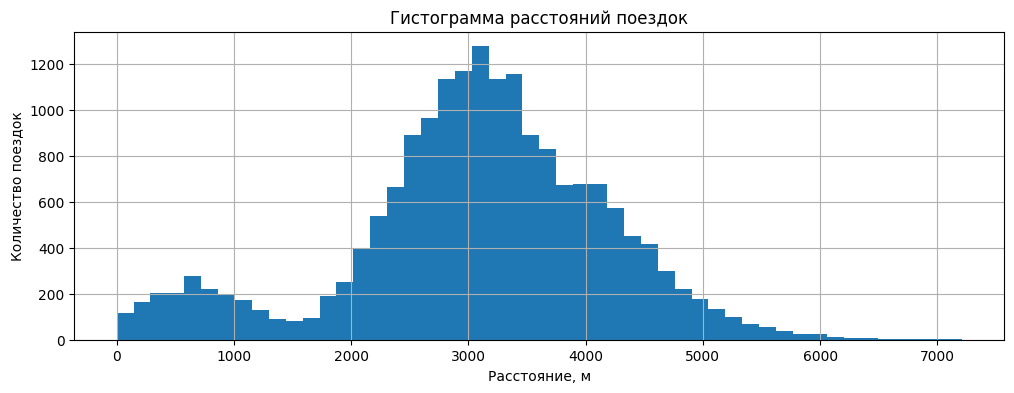

In [29]:
rides_data['distance'].hist(bins=50, figsize=(12,4))

plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid(True)

plt.show()

В столбце с расстояниями поездок на первый взгляд аномалий нет.

In [30]:
len(rides_data['duration'].unique())

17974

Количество уникальных значений длительности поездки меньше количества строк. Посмотрим на дубликаты.

In [31]:
duration_duplicates = rides_data['duration'][rides_data['duration'].duplicated(keep=False)]
print(duration_duplicates)

6531     0.5
6570     0.5
6680     0.5
6695     0.5
6768     0.5
        ... 
17004    0.5
17242    0.5
17314    0.5
17505    0.5
17909    0.5
Name: duration, Length: 95, dtype: float64


In [32]:
duration_duplicates.value_counts()

duration
0.5    95
Name: count, dtype: int64

Посмотрим на информацию о данных поездках.

In [33]:
rides_data[rides_data['duration'] == 0.5]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Пользователи не могли преодолевать по несколько километров за 0,5 минуты. В таблице скорее всего ошибка. Предлагается добавить столбец с данными о средней скорости поездки и сравнить среднюю скорость обычной поездки и поездки длительностью 0,5 минуты.

In [34]:
rides_data['speed'] = rides_data['distance'] / (rides_data['duration'] * 60)

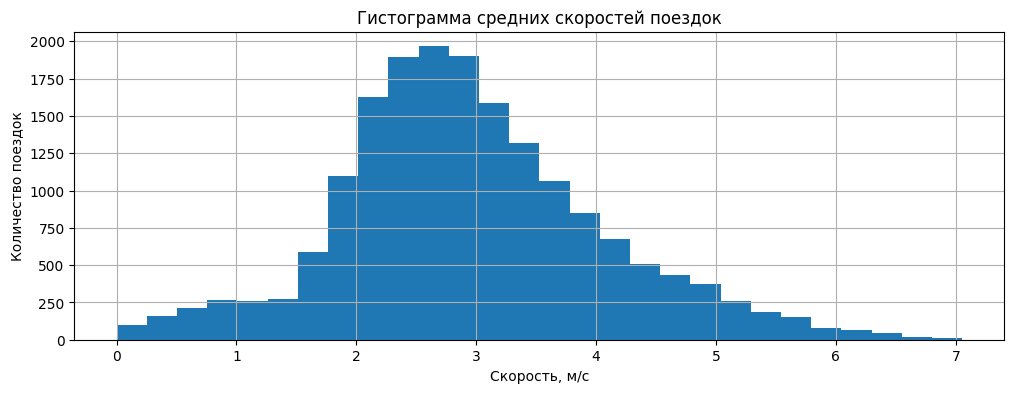

In [35]:
rides_data['speed'][rides_data['duration'] != 0.5].hist(bins=28, figsize=(12,4))

plt.title('Гистограмма средних скоростей поездок')
plt.xlabel('Скорость, м/с')
plt.ylabel('Количество поездок')
plt.grid(True)

plt.show()

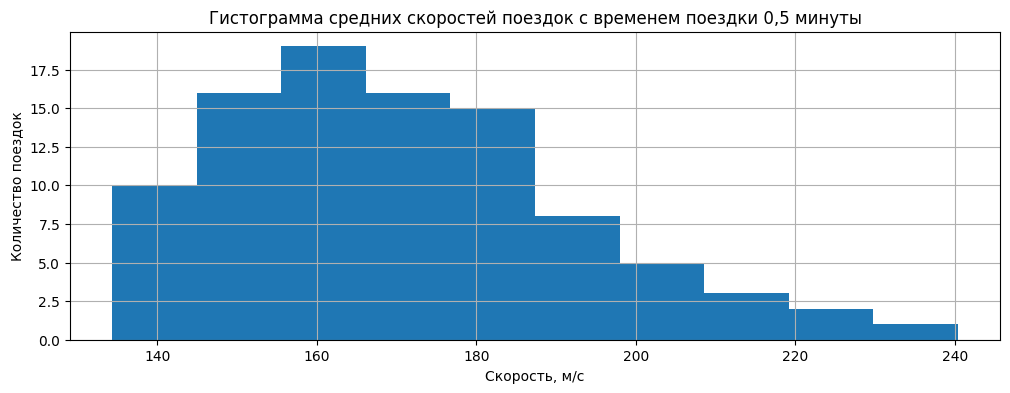

In [36]:
rides_data['speed'][rides_data['duration'] == 0.5].hist(bins=10, figsize=(12,4))

plt.title('Гистограмма средних скоростей поездок с временем поездки 0,5 минуты')
plt.xlabel('Скорость, м/с')
plt.ylabel('Количество поездок')
plt.grid(True)

plt.show()

Поездки с длительностью 0,5 минуты имеют аномальные скорости.

Строки с аномальной скоростью передвижения удалять не будем, так как эти строки могут содержать важную информацию, удаление которой может повлиять на результаты исследования. Однако будем иметь ввиду факт ошибочной фиксации времени.

**Промежуточный итог:**

В ходе предобработки данных в столбце с датами поездок тип данных был приведен к типу datetime. Был создан новый столбец с информацией о месяце поездки (данная информация потребуется для дальнейшего анализа). 

Был произведен поиск пропусков, дубликатов, ошибкок и аномалий. Таблица с данными о пользователях была очищена от явных дубликатов.

Проверим таблицы на наличие пропусков.

In [37]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [38]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
speed       0
dtype: int64

In [39]:
subscriptions_data.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски в таблицах отсутствуют.

Расстояние поездки имеет точность шесть знаков после запятой. Средства измерения самоката не могут измерять расстояния поездки с такой точностью. Округление расстояний до сантиметров не повлияет на точность выводов. Поэтому, для упрощения восприятия данных, округлим расстояния поездок до двух знаков после запятой. 

In [40]:
rides_data['distance'] = rides_data['distance'].round(2)
rides_data['distance'].head()

0    4409.92
1    2617.59
2     754.16
3    2694.78
4    4028.69
Name: distance, dtype: float64

<a class='anchor' id="link3"></a>
## 3 Исследовательский анализ данных

**3.1 Изучим информацию о количестве пользователей по городам**

In [41]:
users_data['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [42]:
users_data['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

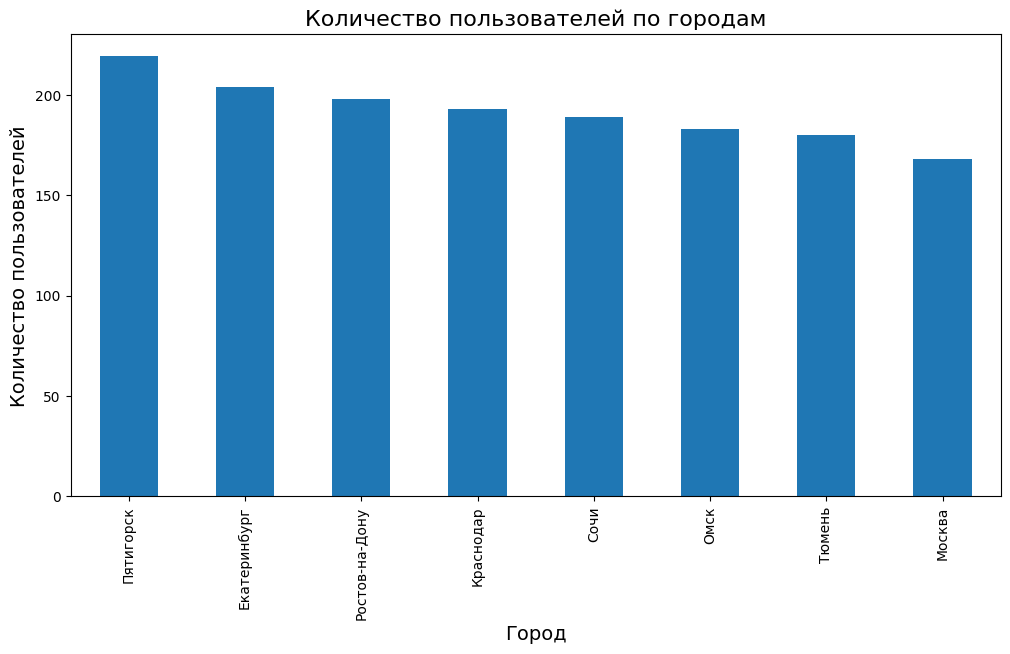

In [43]:
city_counts = users_data['city'].value_counts()

# Построение графика
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')  # Гистограмма
plt.title('Количество пользователей по городам', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
#plt.tight_layout()
plt.show()

В таблице представленна информация о пользователях из 8 городов. Наибольшее количество пользователей в Пятигорске - 219, наименьшее в Москве - 168. Пользователи достаточно равномерно распределены между городами, что позволит провести анализ качественнее.

**3.2 Изучим соотношение пользователей с подпиской и без**

In [44]:
users_data['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

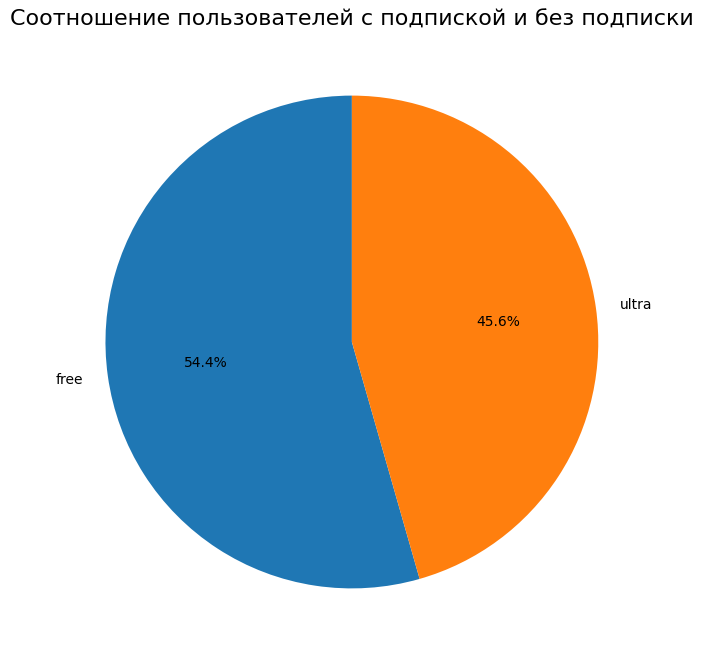

In [45]:
subscription_counts = users_data['subscription_type'].value_counts()
subscription_counts.plot(
    kind='pie',
    autopct='%1.1f%%',    # Процент с одним знаком после запятой
    startangle=90,       # Угол начала диаграммы
    labels=subscription_counts.index,
    figsize=(8, 8)
)
plt.title("Соотношение пользователей с подпиской и без подписки", fontsize=16)
plt.ylabel('')  # Убираем ось Y
plt.show()

Количество пользователей без подписки больше, чем количество пользователей с подпиской - 54.4% против 45.6%.

**3.3 Изучим возраст пользователей**

In [46]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

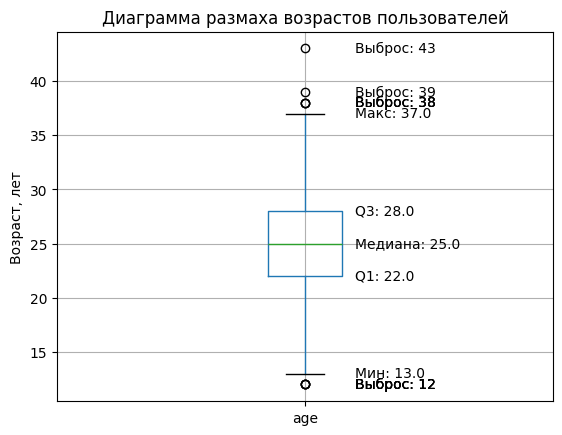

In [47]:
ax = users_data.boxplot(column='age')

# Добавление подписей
ax.set_title("Диаграмма размаха возрастов пользователей")  # Заголовок
ax.set_ylabel("Возраст, лет")              # Подпись оси Y

data = users_data['age']

# Извлечение статистики
quartiles = np.percentile(data, [25, 50, 75])  # Q1, медиана, Q3
q1, median, q3 = quartiles
iqr = q3 - q1  # Интерквартильный размах
lower_whisker = max(min(data), q1 - 1.5 * iqr)  # Нижняя граница (без учета выбросов)
upper_whisker = min(max(data), q3 + 1.5 * iqr)  # Верхняя граница (без учета выбросов)
outliers = [x for x in data if x < lower_whisker or x > upper_whisker]  # Выбросы

# Подписываем значения
ax.text(1.1, q1, f"Q1: {q1}", verticalalignment='center')
ax.text(1.1, median, f"Медиана: {median}", verticalalignment='center')
ax.text(1.1, q3, f"Q3: {q3}", verticalalignment='center')
ax.text(1.1, lower_whisker, f"Мин: {lower_whisker}", verticalalignment='center')
ax.text(1.1, upper_whisker, f"Макс: {upper_whisker}", verticalalignment='center')

# Отметка выбросов
for outlier in outliers:
    ax.text(1.1, outlier, f"Выброс: {outlier}", verticalalignment='center')

# Показ графика
plt.show()

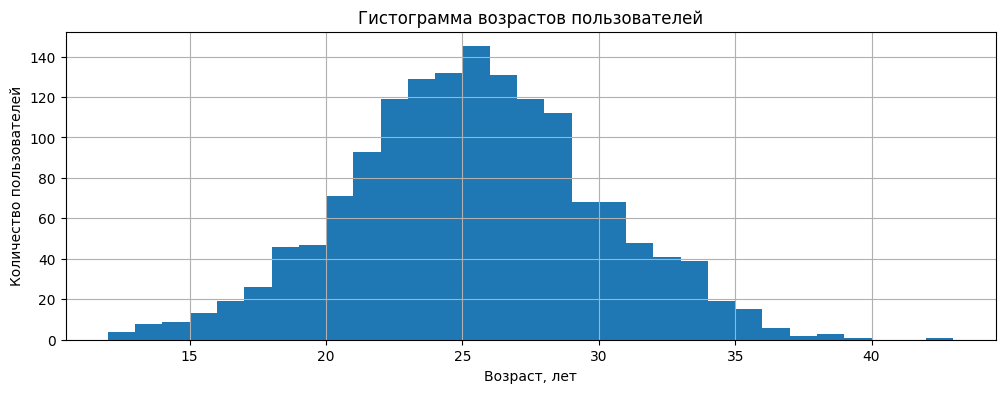

In [48]:
users_data['age'].hist(bins=43-12, range=(12, 43), figsize=(12,4))

plt.title('Гистограмма возрастов пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей')
plt.grid(True)

plt.show()

Возраста пользователей имеют распределение близкое к нормальному. Средний возраст ползователя 24.9 лет. Минимальный возраст 12 лет, максимальный - 43 года. 50% центральных пользователей имеют возраст от 22 до 28 лет. Возраст пользователей от 13 лет до 37 лет для данной выборки можно считать нормальным. Только 4 пользователя из 1534 не попадают в данный диапазон.

**3.4 Изучим информацию о расстояниях поездок**

In [49]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

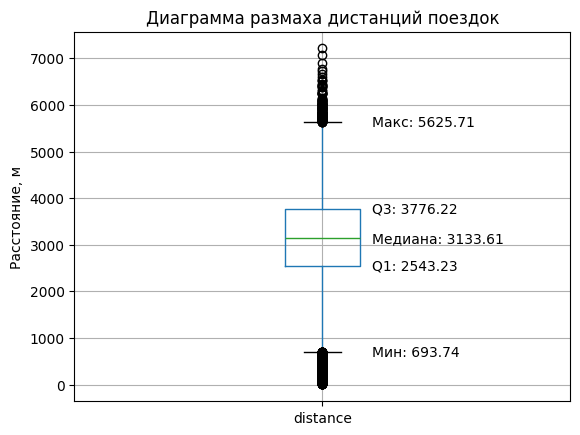

In [50]:
ax = rides_data.boxplot(column='distance')

# Добавление подписей
ax.set_title("Диаграмма размаха дистанций поездок")  # Заголовок
ax.set_ylabel("Расстояние, м")              # Подпись оси Y

data = rides_data['distance']

# Извлечение статистики
quartiles = np.percentile(data, [25, 50, 75])  # Q1, медиана, Q3
q1, median, q3 = quartiles
iqr = q3 - q1  # Интерквартильный размах
lower_whisker = max(min(data), q1 - 1.5 * iqr)  # Нижняя граница (без учета выбросов)
upper_whisker = min(max(data), q3 + 1.5 * iqr)  # Верхняя граница (без учета выбросов)
outliers = [x for x in data if x < lower_whisker or x > upper_whisker]  # Выбросы

# Подписываем значения
ax.text(1.1, q1, f"Q1: {q1.round(2)}", verticalalignment='center')
ax.text(1.1, median, f"Медиана: {median.round(2)}", verticalalignment='center')
ax.text(1.1, q3, f"Q3: {q3.round(2)}", verticalalignment='center')
ax.text(1.1, lower_whisker, f"Мин: {lower_whisker.round(2)}", verticalalignment='center')
ax.text(1.1, upper_whisker, f"Макс: {upper_whisker.round(2)}", verticalalignment='center')

# Отметка выбросов
#for outlier in outliers:
#   ax.text(1.1, outlier, f"Выброс: {outlier}", verticalalignment='center')

# Показ графика
plt.show()

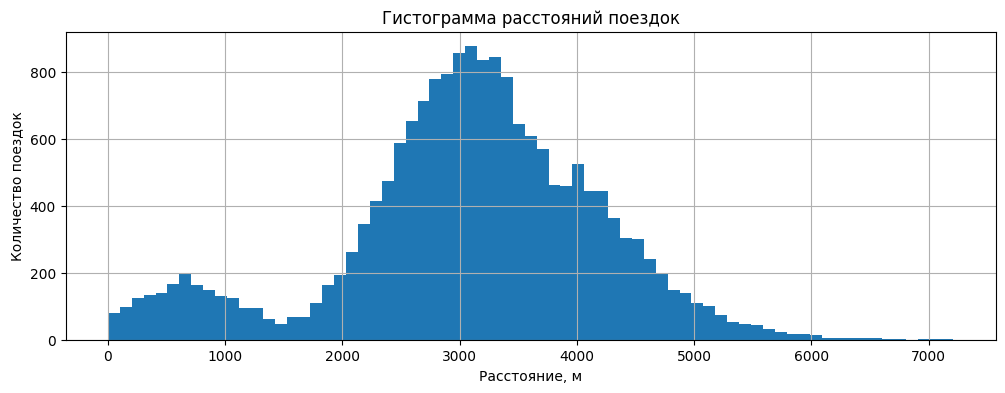

In [51]:
rides_data['distance'].hist(bins=71, figsize=(12,4))

plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid(True)

plt.show()

Расстояния поездок имеют широкий разброс от 0,86 до 7211 м. В гистограмме имеется два пиковых значения около 700 м и около 3100 м. </br>
Среднее расстояние поездки 3071 м. Медианное - 3134 м. </br>
Межквартильный размах охватывает значения от 2543 м до 3776 м.</br>
Поездки менее 2543 м можно считать короткими. </br>
Поездки более 3776 м можно считать длинными.

**3.5 Изучим продолжительность поездок**

In [52]:
rides_data['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

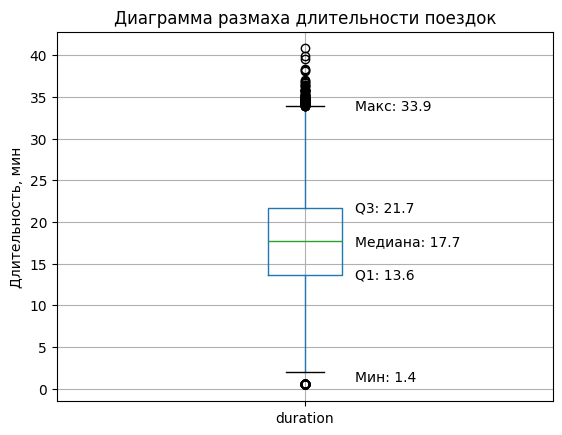

In [53]:
ax = rides_data.boxplot(column='duration')

# Добавление подписей
ax.set_title("Диаграмма размаха длительности поездок")  # Заголовок
ax.set_ylabel("Длительность, мин")              # Подпись оси Y

data = rides_data['duration']

# Извлечение статистики
quartiles = np.percentile(data, [25, 50, 75])  # Q1, медиана, Q3
q1, median, q3 = quartiles
iqr = q3 - q1  # Интерквартильный размах
lower_whisker = max(min(data), q1 - 1.5 * iqr)  # Нижняя граница (без учета выбросов)
upper_whisker = min(max(data), q3 + 1.5 * iqr)  # Верхняя граница (без учета выбросов)
outliers = [x for x in data if x < lower_whisker or x > upper_whisker]  # Выбросы

# Подписываем значения
ax.text(1.1, q1, f"Q1: {q1.round(1)}", verticalalignment='center')
ax.text(1.1, median, f"Медиана: {median.round(1)}", verticalalignment='center')
ax.text(1.1, q3, f"Q3: {q3.round(1)}", verticalalignment='center')
ax.text(1.1, lower_whisker, f"Мин: {lower_whisker.round(1)}", verticalalignment='center')
ax.text(1.1, upper_whisker, f"Макс: {upper_whisker.round(1)}", verticalalignment='center')

# Отметка выбросов
#for outlier in outliers:
#   ax.text(1.1, outlier, f"Выброс: {outlier}", verticalalignment='center')

# Показ графика
plt.show()

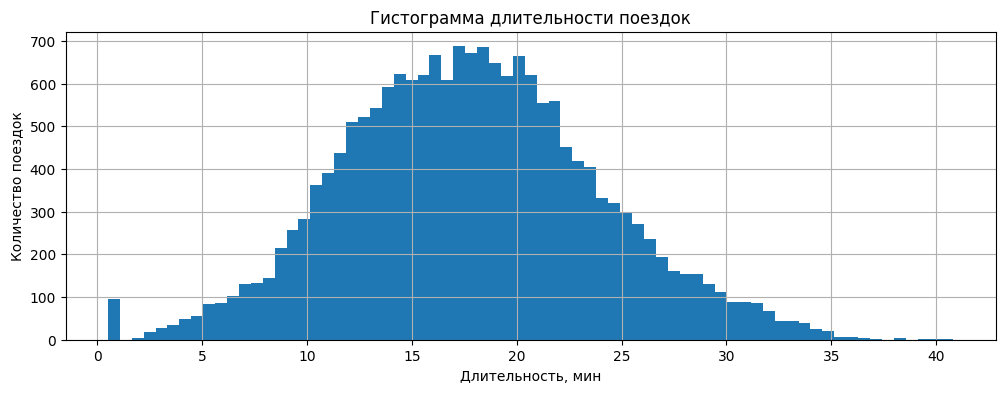

In [54]:
rides_data['duration'].hist(bins=71, figsize=(12,4))

plt.title('Гистограмма длительности поездок')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')
plt.grid(True)

plt.show()

Распределение имеет вид близкий к нормальному. Средняя длительность поездки 17.8 мин. Медианное - 17.7 мин. </br>
Межквартильный размах охватывает значения от 13.6 мин до 21.7 мин.</br>
Поездки короче 13.6 мин можно считать недлительными. </br>
Поездки дольше 21.7 мин можно считать длительными. </br>
Поездки длительностью менее 1.4 мин можно считать аномально короткими. </br>
Поездки дольше 33.9 мин можно считать аномально долгими.

**Промежуточный итог:**

В ходе исследовательского анализа данных была изучена, визуализована и описана общая информация о пользователях и поездках сервиса GoFast. 

Сервисом пользуются в 8 городах. Больше всего пользователей в Пятигорске (219), меньше всего в Москве (168). 

Пользователей без подписки больше (54,4%), чем с подпиской (45,6%).

Возраст пользователей распределён близко к нормальному. Минимальный возраст 12 лет, максимальный - 43 года. Средний возраст — 24,9 года, половина пользователей имеет возраст от 22 до 28 лет. 

Расстояния поездок варьируются от 0,86 м до 7211 м, с пиками около 700 м и 3100 м. Среднее расстояние — 3071 м, медиана — 3134 м. Короткими можно считать поездки менее 2543 м, длинными — более 3776 м.

Длительность поездок также распределена близко к нормальному. Средняя длительность — 17,8 мин, медиана — 17,7 мин. Недлительными можно считать поездки короче 13,6 мин, длительными — более 21,7 мин, аномально долгими — свыше 34 мин.

<a class='anchor' id="link4"></a>
## 4 Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм**

Сначала объединеним таблицы с пользователями и поездками используя общий столбец `user_id`. 

In [55]:
merged_data = pd.merge(users_data, rides_data, on='user_id', how='outer')

In [56]:
merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,2.871067
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,2.758228
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,2.016865
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,2.426290
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,2.556358


Далее объединим полученный датафрейм и таблицу с подписками используя столбец `subscription_type`.

In [57]:
merged_data = pd.merge(merged_data, subscriptions_data, on='subscription_type', how='outer')

In [58]:
merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1,2.805633,8,50,0
1,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2,0.869469,8,50,0
2,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2,3.334256,8,50,0
3,700,Айдар,22,Омск,free,1205.91,9.782872,2021-02-10,2,2.054460,8,50,0
4,700,Айдар,22,Омск,free,3047.38,17.427673,2021-02-14,2,2.914311,8,50,0


In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   speed              18068 non-null  float64       
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(

Данные успешно объединены. Все поездки учтены. Пропусков нет.

**4.2 Создадим два датафрейма из объединенного датафрейма с данными о пользователях с подпиской и без подписки**

Выберем пользователей с подпиской `ultra`.

In [60]:
subscribers_df = merged_data[merged_data['subscription_type'] == 'ultra']

In [61]:
subscribers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 11568 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int32         
 9   speed              6500 non-null   float64       
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(3)

Выберем пользователей без подписки (`free`).

In [62]:
free_users_df = merged_data[merged_data['subscription_type'] == 'free']

In [63]:
free_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 0 to 11567
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int32         
 9   speed              11568 non-null  float64       
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(3)
me

Датафреймы созданы успешно. Все строки учтены, пропусков нет.

**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей с подпиской и без**

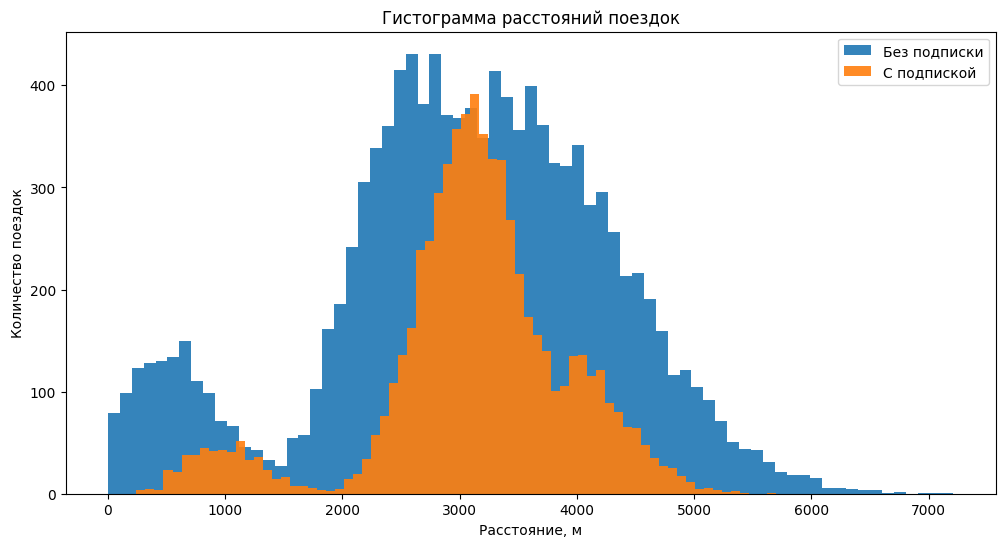

In [64]:
plt.figure(figsize=(12, 6))

plt.hist(free_users_df['distance'], bins=71, alpha=0.9, label='Без подписки')

plt.hist(subscribers_df['distance'], bins=71, alpha=0.9, label='С подпиской')

# Добавление легенды, заголовка и подписей осей
plt.legend()
plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')

# Показать график
plt.show()

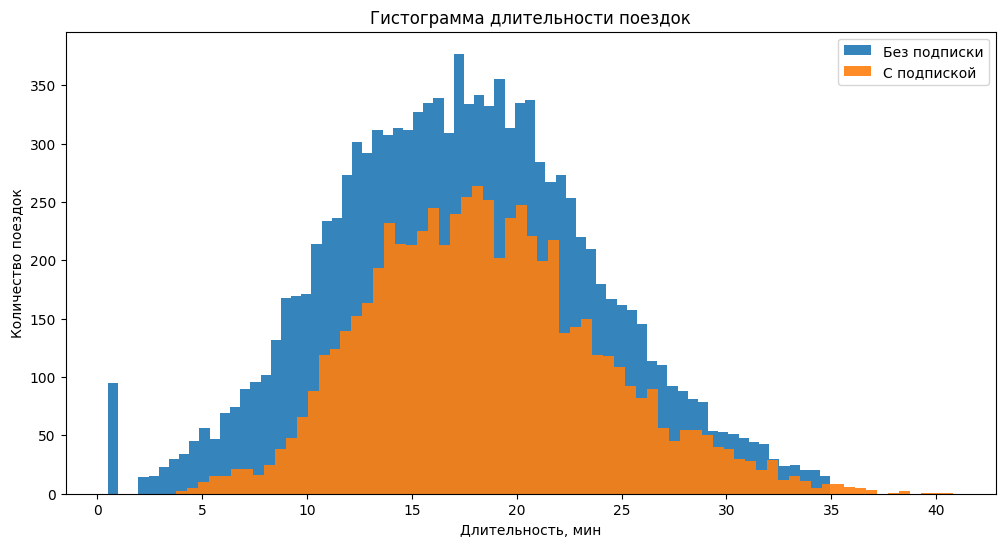

In [65]:
plt.figure(figsize=(12, 6))

plt.hist(free_users_df['duration'], bins=71, alpha=0.9, label='Без подписки')

plt.hist(subscribers_df['duration'], bins=71, alpha=0.9, label='С подпиской')

# Добавление легенды, заголовка и подписей осей
plt.legend()
plt.title('Гистограмма длительности поездок')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')

# Показать график
plt.show()

**Промежуточный итог:**

В ходе объединения данных был создан единый датафрейм с информацией о всех пользователях, их поездках и подписках. Из объединенного датафрейма были созданы два датафрейма с данными о пользователях с подпиской и без. Визуализирована информация о расстояниях и длительности поездок пользователей обеих категорий.

<a class='anchor' id="link5"></a>
## 5 Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках**

Сначала округлим длительность каждой поездки до следующего целого числа.

In [66]:
merged_data['duration'] = np.ceil(merged_data['duration'])

Агрегируем данные.

In [67]:
merged_data['rides_count'] = 1 # введем новый столбец для подсчета количества поездок

pivot_df = merged_data.pivot_table(
    index=['user_id', 'month'],
    values=['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee', 'rides_count', 'subscription_type'],
    aggfunc={'distance': 'sum',
             'duration': 'sum',
             'minute_price': 'mean', 
             'start_ride_price': 'mean',
             'subscription_fee': 'mean',
             'rides_count': 'sum',
             'subscription_type': 'min'}
).reset_index()

In [68]:
pivot_df.head(8)

,user_id,month,distance,duration,minute_price,rides_count,start_ride_price,subscription_fee,subscription_type
0,1,1,7027.51,42.0,6.0,2,0.0,199.0,ultra
1,1,4,754.16,7.0,6.0,1,0.0,199.0,ultra
2,1,8,6723.47,46.0,6.0,2,0.0,199.0,ultra
3,1,10,5809.91,32.0,6.0,2,0.0,199.0,ultra
4,1,11,7003.50,56.0,6.0,3,0.0,199.0,ultra
5,1,12,6751.63,28.0,6.0,2,0.0,199.0,ultra
6,2,3,10187.73,63.0,6.0,3,0.0,199.0,ultra
7,2,4,6164.39,40.0,6.0,2,0.0,199.0,ultra


Проверим вновь созданную таблицу на наличие пропусков.

In [69]:
pivot_df.isna().sum()

user_id              0
month                0
distance             0
duration             0
minute_price         0
rides_count          0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

Пропуски в сводной таблице отсутствуют.

**5.2 Добавим столбец с месячной выручкой, которую принес каждый пользователь**

In [70]:
def revenue_calculator(row):
    return row['duration'] * row['minute_price'] + row['start_ride_price'] * row['rides_count'] + row['subscription_fee']

pivot_df['revenue'] = pivot_df.apply(revenue_calculator, axis=1)

In [71]:
pivot_df.sample(8)

,user_id,month,distance,duration,minute_price,rides_count,start_ride_price,subscription_fee,subscription_type,revenue
8282,1163,10,6038.94,37.0,8.0,2,50.0,0.0,free,396.0
4685,718,9,3748.84,18.0,8.0,1,50.0,0.0,free,194.0
9124,1264,8,2528.57,11.0,8.0,1,50.0,0.0,free,138.0
3636,557,8,2414.96,21.0,6.0,1,0.0,199.0,ultra,325.0
7825,1108,6,2887.21,16.0,8.0,1,50.0,0.0,free,178.0
9623,1325,10,6489.18,30.0,8.0,2,50.0,0.0,free,340.0
7098,1018,12,9534.62,36.0,8.0,3,50.0,0.0,free,438.0
8555,1198,3,10238.20,52.0,8.0,3,50.0,0.0,free,566.0


**Промежуточный итог:**

Данные о поездках для каждого пользователя были сагрегированы по месяцам. Для каждого пользователя была вычислена помесячная выручка.

<a class='anchor' id="link6"></a>
## 6 Проверка гипотез

**6.1 Проверим, тратят ли пользователи с подпиской больше времени на поездки**

Проведем проверку гипотезы о равенстве средних двух генеральных совокупностей. </br>

Нулевая гипотеза: Пользователи с подпиской и без в среднем тратят одинаковое количество времени на каждую отдельную поездку. </br>
Альтернативная гипотеза: Пользователи с подпиской в среднем тратят больше времени на каждую отдельную поездку, чем в среднем пользователи без подписки. 

In [72]:
# задаём уровень значимости
alpha = 0.01

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(subscribers_df['duration'], 
                       free_users_df['duration'], 
                       alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


На основе имеющихся данных, на уровне статистической значимости 1%, есть основания отвергнуть нулевую гипотезу в пользу альтернативной.

С высокой долей вероятности можно сказать, что пользователи с подпиской тратят больше времени на поездки.

Сопоставим результат тестирования гипотезы со средними значениями времени поездок пользователей с подпиской и без.

In [73]:
subscribers_df['duration'].mean()

np.float64(18.54198516280583)

In [74]:
free_users_df['duration'].mean()

np.float64(17.39090929866399)

Пользователи с подпиской в среднем тратят больше времени на поездки, чем пользователи без подписки.

**6.2 Проверим гипотезу, что среднее расстояние поездки пользователей с подпиской не превышает 3130 метров**

Проведем проверку односторонней гипотезы. </br>
Нулевая гипотеза: Расстояние одной поездки пользователей с подпиской равняется или менее 3130 м. </br>
Альтернативная гипотеза: Расстояние одной поездки пользователей с подпиской более 3130 м.

In [75]:
distance_value = 3130

alpha = 0.01 # уровень статистической значимости

results = st.ttest_1samp(
    subscribers_df['distance'], 
    distance_value,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195362605842414
Не отвергаем нулевую гипотезу


С высокой долей вероятности можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает  оптимального  с точки зрения износа самоката расстояния в 3130 метров.

Сопоставим результат тестирования гипотезы со средним значением дальности поездок пользователей с подпиской.

In [76]:
subscribers_df['distance'].mean()

np.float64(3115.445430769231)

Пользователи с подпиской в среднем совершают поездки на расстояние 3115 м.

**6.3 Сравним помесячную выручку пользователей с подпиской и без подписки**

Для этого проведем проверку гипотезы о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: Пользователи с подпиской и без в среднем ежемесячно тратят одинаковое количество денег. </br>
Альтернативная гипотеза: Пользователи с подпиской в среднем ежемесячно тратят больше, чем пользователи без подписки.

In [77]:
# задаём уровень значимости
alpha = 0.01

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «меньше»
results = st.ttest_ind(pivot_df['revenue'][pivot_df['subscription_type'] == 'ultra'], 
                       pivot_df['revenue'][pivot_df['subscription_type'] == 'free'], 
                       alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


На основе имеющихся данных с уровнем доверия 99% можно отвергнуть нулевую гипотезу в пользу альтернативной.

С высокой долей вероятности пользователи с подпиской в среднем ежемесячно тратят больше денег, чем пользователи без подписки.

Сопоставим результат тестирования гипотезы со средними ежемесячными тратами пользователей с подпиской и без.

In [78]:
pivot_df['revenue'][pivot_df['subscription_type'] == 'ultra'].mean()

np.float64(362.7921906022502)

In [79]:
pivot_df['revenue'][pivot_df['subscription_type'] == 'free'].mean()

np.float64(328.6413651073845)

Пользователи с подпиской в среднем ежемесячно тратят больше, чем пользователи без подписки.

**Промежуточный итог:**

* Время поездок: Анализ показал, что с высокой долей вероятности, пользователи с подпиской проводят больше времени в поездках по сравнению с пользователями без подписки. </br>
* Дальность поездок: Гипотеза о том, что средняя дальность поездки пользователей с подпиской не превышает 3130 метров, не была отвергнута. </br>
* Помесячная выручка: Было установлено, что пользователи с подпиской с высокой вероятностью в среднем приносят больше выручки ежемесячно, чем пользователи без подписки. </br>

## Общий вывод

**Целью проекта** было провести статистический анализ данных сервиса аренды самокатов GoFast, чтобы выявить ключевые особенности использования сервиса пользователями, проверить гипотезы и сформулировать рекомендации для увеличения доходности и количества пользователей с подпиской.

**Задачи**, которые для этого были решены:
* Загрузка и первичная обработка данных (приведение типов, создание новых столбцов, очистка от пропусков, дубликатов).
* Исследовательский анализ данных (анализ распределения пользователей по городам, возрасту, типу подписки, длительности и расстоянию поездок).
* Объединение данных из нескольких таблиц для комплексного анализа и разделение их по категориям пользователей (с подпиской и без).
* Агрегация данных для подсчёта помесячной выручки от каждого пользователя.
* Проверка гипотез о разнице в поведении пользователей с подпиской и без.

**Итоги:**

В ходе предобработки данных были устранены дубликаты, выявлены аномалии в данных. Внесены изменения в структуру таблиц, включая преобразование типов данных и добавление новых столбцов для удобства анализа. В результате объединения таблиц создан единый датафрейм, содержащий полную информацию о пользователях, их поездках и подписках.

Исследовательский анализ данных показал:

* Сервисом пользуются жители 8 городов. Наибольшее число пользователей находится в Пятигорске (219), наименьшее — в Москве (168).
* Число пользователей без подписки больше (54,4%), чем с подпиской (45,6%).
* Возраст пользователей имеет нормальное распределение, средний возраст составляет 24,9 года.
* Расстояния и длительность поездок также имеют нормальное распределение. Среднее расстояние составляет 3071 м, средняя длительность поездки — 17,8 мин.


Проверка гипотез выявила следующее:

* С высокой вероятностью пользователи с подпиской проводят больше времени на поездки, чем пользователи без подписки.
* Среднее расстояние поездки пользователей с подпиской с высокой долей вероятности не превышает оптимального расстояния с точки зрения износа самоката. 
* Ежемесячная выручка от пользователей с подпиской с высокой вероятностью в среднем выше, чем от пользователей без подписки.
* Для проверки влияния обновления серверов на число обращений в техподдержку рекомендуется провести парный t-тест.

**Рекомендации:**

* Учитывая, что подписчики с высокой долей вероятности приносят больше выручки, стоит акцентировать внимание на продвижении подписки.
* Требуется обратить внимание на некорректрую фиксацию времени некоторых поездок.
* Необходимо провести проверку аккаунтов, исключив пользователей младше 18 лет (или 14 лет в соответствующих регионах). Это поможет соответствовать законодательным требованиям и избежать нарушения норм проката самокатов.